# Régrassion Linéaire simple

Nous importons les librairies :

In [92]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

1. DATASET

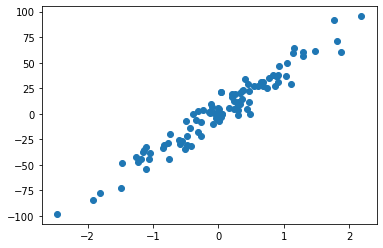

In [93]:
x, y = make_regression(n_samples = 100, n_features=1, noise=10)
plt.scatter(x,y)

In [94]:
print(x.shape)
y = y.reshape(y.shape[0],1) #redimessionner
print(y.shape)

(100, 1)
(100, 1)


In [95]:
#matrice X
X = np.hstack((x,np.ones(x.shape)))
X.shape

(100, 2)

In [96]:
theta = np.random.randn(2,1)
theta

array([[-0.14123535],
       [ 1.33274743]])

In [97]:
#Modele

In [98]:
def model(X,theta):
    return X.dot(theta) #produit matriciel

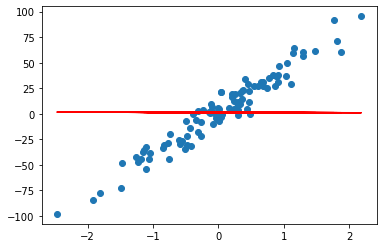

In [99]:
plt.scatter(x,y)
plt.plot(x,model(X,theta), c='r')

In [100]:
#Fonction cout

In [101]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [102]:
cost_function(X,y,theta)

653.13987117542

In [103]:
#Gradient descent

In [104]:
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [105]:
def gradient_descent(X,y,theta, learning_rate, n_iteration):
    cost_history = np.zeros(n_iteration)
    for i in range(0, n_iteration):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] =  cost_function(X,y,theta)
    return theta, cost_history

In [106]:
#Machine learning

In [107]:
theta_final, cost_history = gradient_descent(X,y,theta, learning_rate=0.01, n_iteration=1000)

In [108]:
theta_final

array([[40.78803753],
       [ 1.58200859]])

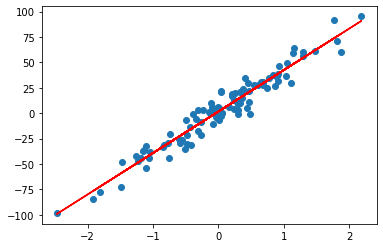

In [109]:
predictions = model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions, c='r')

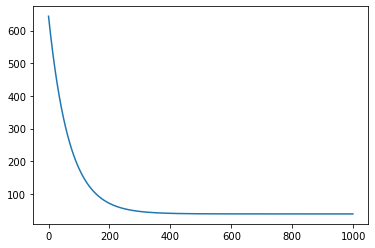

In [110]:
plt.plot(range(1000), cost_history)

In [111]:
#Coef de determination

In [112]:
def coef_determination(y, pred):
    u = ((y-pred)**2).sum() 
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [113]:
coef_determination(y, predictions)

0.9403179601578983